#### Symbolic python

In [104]:
import numpy as np
import sympy as sp

In [105]:
x, y = sp.symbols('x , y')

In [106]:
expression_1 = (x+y)**2

In [107]:
expression_1.expand()

x**2 + 2*x*y + y**2

In [108]:
exp_2 = (x+y)*(x-y)

In [109]:
exp_2.subs({x : 1, y :2})

-3

In [110]:
expression = sp.sin(x) + x**4 + sp.exp(x)

In [93]:
expression

x**4 + exp(x) + sin(x)

Making a function from an expression

In [98]:
f1 = sp.lambdify(x, expression)
f1(1)

4.559752813266941

In [21]:
sp.diff(sp.diff(expression, x), x)

12*x**2 + exp(x) - sin(x)

In [20]:
sp.diff(expression, y)

0

In [22]:
sp.diff(expression, x, 2)

12*x**2 + exp(x) - sin(x)

You can define functions symbolically and then see things like the product rule

In [25]:
g = sp.Function('g')(x)
t = sp.Function('t')(x)

In [26]:
w = g*t
sp.diff(w, x)

g(x)*Derivative(t(x), x) + t(x)*Derivative(g(x), x)

You can also define function with symbolic input

In [103]:
sp.exp(-1/x**2)

def special_exp(x):
    return sp.exp(-1/x**2)

g = special_exp(x)
sp.diff(g, x)
print(special_exp(1))
print(special_exp(x))

0.367879441171442
exp(-1/x**2)


This function calculates the taylor series of any function symbolically

In [120]:
def taylor_series(f , a):
    x, y = sp.symbols('x , y')
    #print(sp.diff(f(x),x))
    #print(sp.diff(sp.diff(f(x),x),x))
    first_term = sp.limit(f(x), x, 0)
    second_term = (x-a)*sp.limit(sp.diff(f(x), x), x, 0)
    third_term = (1/6)*(x-a)**3*sp.limit(sp.diff(f(x), x, 3), x, 0)
    
    return first_term + second_term +third_term

In [121]:
taylor_series(sp.exp, 0)

0.166666666666667*x**3 + x + 1

In [122]:
sp.diff(sp.exp(-1/x**2), x, 1)

2*exp(-1/x**2)/x**3

In [124]:
taylor_series(special_exp, 0)

0

The taylor series for $$e^{-1/x^2}$$ is 0 regardless of the number of terms considered. Why?

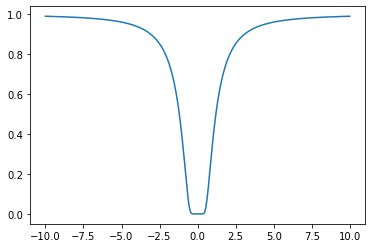

In [85]:
import matplotlib.pyplot as plt

t = np.linspace(-10, 10, 1000)
plt.plot(t, np.exp(-1/t**2))

It is continuous and differentiable along the real line. But take a step in the complex plane and the function bceomes infinity

In [112]:
sp.limit(sp.exp(-1/x**2), x, 0)

0

when x is 0.000001i

In [119]:
sp.limit(sp.exp(-1/x**2), x, sp.I*0.00001)

1.07774855231438e+4342944819

The function needs to be differentiable in the complex plane to have a valid taylor series. This property is called analyticity.